In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Population_Data.csv')
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [4]:
numeric_cols=["Indians",'Foreigners','Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female','Total Population']

In [5]:
def cleaner(val):
    return val.replace(',','')

In [6]:
for i in data[numeric_cols]:
    data[i]=data[i].apply(cleaner)
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [8]:
data[numeric_cols]=data[numeric_cols].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


### verifying integrity of data

In [9]:
data[['Indians','Foreigners']].sum().sum() - data['Total Population'].sum()

0

In [10]:
data[['Indian_Male','Foreigners_Male','Indian_Female','Foreigners_Female']].sum().sum() - data['Total Population'].sum()

-112859

In [11]:
MF_sum =data['Indian_Male']+data['Foreigners_Male']+data['Indian_Female']+data['Foreigners_Female']
data['other']=data['Total Population']-MF_sum
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [12]:
data['Region'].nunique(),data['Office Location Id'].nunique()

(38, 38)

In [13]:
data1 = data.drop(columns=['Region','Office Location Id',"Total Population"])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


### Normalization

In [14]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
cols=data1.columns
data1=norm.fit_transform(data1)

data1 = pd.DataFrame(data1,columns = cols)
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


### Clustering

In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(data1)
pred=kmeans.predict(data1)

In [16]:
pred,len(pred)

(array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]),
 38)

In [17]:
kmeans.inertia_

0.028113285898827122

In [18]:
SSE=[] #squared sum of errors, contains inertia scores
for cluster in range(1,10):
    kmeans=KMeans(n_jobs=-1,n_clusters=cluster)
    kmeans.fit(data1)
    SSE.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

In [19]:
frame = pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})

Text(0, 0.5, 'Inertia')

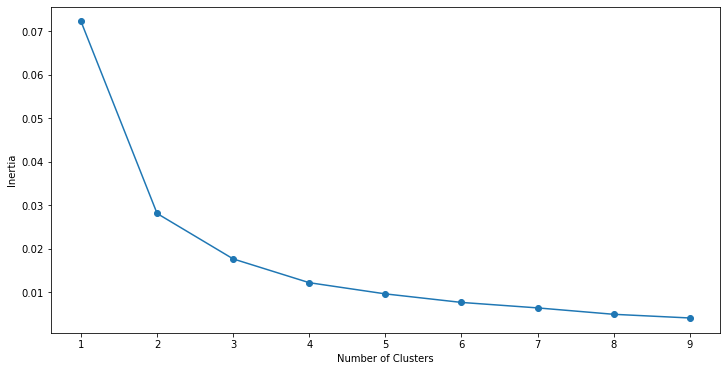

In [20]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1)
pred = kmeans.predict(data1)

In [22]:
data1['cluster']=pred

In [27]:
def seg(str_x,str_y,clusters):
    x=[]
    y=[]
    
    for i in range(clusters):
        x.append(data1[str_x][data1['cluster']==i])
        y.append(data1[str_y][data1['cluster']==i])
        
    return x,y

def plot_clusters(str_x,str_y,clusters):
    plt.figure(figsize=(5,5),dpi=120)
    x,y =seg(str_x,str_y,clusters)
    
    for i in range(clusters):
        plt.scatter(x[i],y[i],label='cluster{}'.format(i))
        
    plt.xlabel(str_x)
    plt.ylabel(str_y)
    plt.title(str(str_x+" Vs "+str_y))
    plt.legend()        

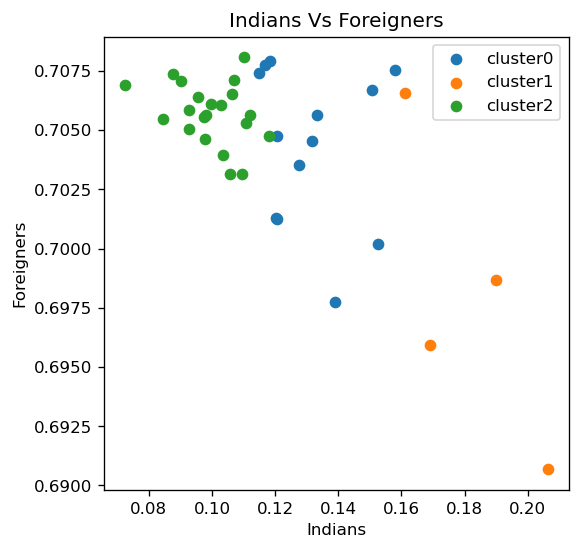

In [28]:
plot_clusters('Indians','Foreigners',3)

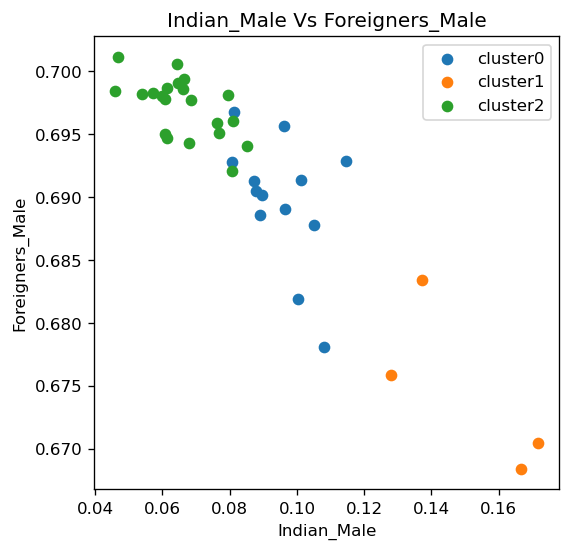

In [29]:
plot_clusters('Indian_Male','Foreigners_Male',3)